In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [3]:
for i in train.columns:
    if train[i].dtypes=='object':
        train[i] = train[i].fillna(train[i].mode()[0])
    else:
        train[i] = train[i].fillna(train[i].mean())

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['default_status'] = le.fit_transform(train['default_status'])
train['form_field47'] = le.fit_transform(train['form_field47'])

<AxesSubplot:title={'center':'Correlation with target'}>

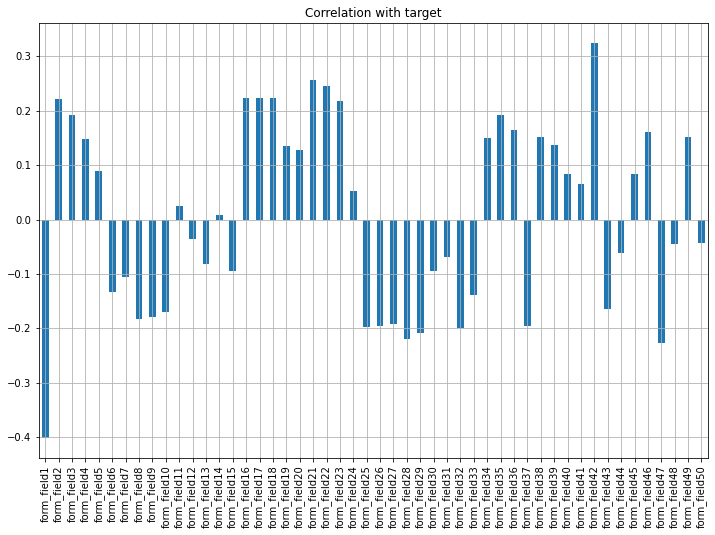

In [5]:

train.drop('default_status', axis=1).corrwith(train.default_status).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [6]:
train = train.drop(['form_field11', 'form_field14', 'Applicant_ID'], axis=1)
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.00000,0.0,0,305244.932775,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,...,0.314281,8.08,0.183584,0.07252,0.0,0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,624447.924437,956940.0,2.626690e+06,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.00000,0.0,0,305244.932775,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,...,0.488884,2.02,0.685168,0.07252,0.0,0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.00000,0.0,0,97.887502,1.427891,0.045630,0


In [7]:
x = train.drop(['default_status'], axis=1)
y = train['default_status']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[4.90109890e-01, 1.58228814e-02, 2.88644556e-02, ...,
        5.73659287e-03, 4.03399311e-02, 1.92127706e-10],
       [5.12087912e-01, 3.74131629e-02, 4.08215912e-03, ...,
        6.57404217e-06, 5.78743894e-02, 1.39729671e-09],
       [3.14285714e-01, 2.98888984e-02, 5.49226447e-02, ...,
        5.73659287e-03, 5.40489383e-02, 5.04412225e-11],
       ...,
       [5.60439560e-01, 4.25422078e-02, 0.00000000e+00, ...,
        2.35382649e-05, 7.14285714e-02, 7.07031706e-10],
       [3.18681319e-01, 2.90590367e-03, 3.64570624e-02, ...,
        5.73659287e-03, 0.00000000e+00, 1.29875681e-11],
       [5.84615385e-01, 2.60504412e-02, 0.00000000e+00, ...,
        9.37074814e-05, 1.07142857e-01, 2.93921374e-09]])

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150,random_state=42,max_depth=12,oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=150, oob_score=True,
                       random_state=42)

In [11]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(f'the accuracy of this stuff is: {accuracy}')

the accuracy of this stuff is: 80.15178571428572


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

boost_model = XGBClassifier(n_jobs=-1, random_state=42,max_depth = 5)

#Fitting the model
boost_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
pred = boost_model.predict(x_test)
pred

array([1, 0, 0, ..., 1, 1, 0])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)*100
print(f'the accuracy of this stuff is: {accuracy}')

the accuracy of this stuff is: 80.07142857142857


In [16]:
test = pd.read_csv('test.csv')
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [17]:
for i in test.columns:
    if test[i].dtypes=='object':
        test[i] = test[i].fillna(test[i].mode()[0])
    else:
        test[i] = test[i].fillna(test[i].mean())

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

test['form_field47'] = le.fit_transform(test['form_field47'])

In [23]:
test = test.drop(['form_field11', 'form_field14', 'Applicant_ID'], axis=1)
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.000000,0.34875,10.2006,0.0000,0.0,418564.00000,4.185640e+05,4.185640e+05,5.407100e+05,0.0,...,108.209648,0.825000,1.01,0.800000,0.066526,0.000000,0,301544.001781,0.000000,0.011221
1,3284.000000,1.27360,2.9606,9.0198,0.0,0.00000,9.858816e+06,4.901400e+04,1.510098e+06,18308285.0,...,18.841500,0.507694,4.04,0.623248,1.000000,0.000000,1,301544.001781,0.504974,0.043525
2,3492.284404,0.27505,0.0600,0.0000,0.0,626303.61796,6.797033e+06,2.654142e+06,1.350593e+07,0.0,...,108.209648,0.369684,0.00,0.566219,0.066526,0.097926,0,301544.001781,0.000000,674984.349339
3,3232.000000,0.28505,2.8032,0.0000,0.0,0.00000,4.738020e+05,4.738020e+05,1.724437e+06,493641.0,...,108.209648,0.916663,2.02,0.464224,0.066526,0.097926,0,90.163742,0.788809,0.104029
4,3466.000000,2.09545,0.8318,2.5182,0.0,19839.00000,1.150662e+06,1.150662e+06,7.860523e+06,5752921.0,...,108.209648,0.234047,23.23,0.726688,0.000000,0.000000,1,1303.587148,1.637733,0.163124


In [24]:
y_valid_xg = boost_model.predict(test)
y_valid_xg

array([1, 0, 0, ..., 0, 1, 0])